### Import 및 폰트 설정

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

### 데이터 로드

In [3]:
data = pd.read_csv('G:\\내 드라이브\\노트북\\23-겨울\\빅데이터_미래사회\\data\\고독사_데이터 - 시트1.csv')
data

,년도,우울증_65세이상,실업률_60세이상,빈곤률,1인가구,무연고사망자수
0,1985,NaN,0.3,NaN,8.4,NaN
1,1986,NaN,0.3,NaN,NaN,NaN
2,1987,NaN,0.3,NaN,NaN,NaN
3,1988,NaN,0.2,NaN,NaN,NaN
4,1989,NaN,0.2,NaN,NaN,NaN
5,1990,NaN,0.4,NaN,10.9,NaN
6,1991,NaN,0.3,NaN,NaN,NaN
7,1992,NaN,0.4,NaN,NaN,NaN
8,1993,NaN,0.4,NaN,NaN,NaN
9,1994,NaN,0.3,NaN,NaN,NaN


In [4]:
select_data = data.loc[22:36]
select_data = select_data.reset_index(drop = True)
select_data

,년도,우울증_65세이상,실업률_60세이상,빈곤률,1인가구,무연고사망자수
0,2007,4.55,1.4,43.6,17.7,603.0
1,2008,4.65,1.2,44.1,17.9,563.0
2,2009,4.90,1.6,45.9,18.2,521.0
3,2010,3.55,2.8,46.3,18.5,578.0
4,2011,4.00,2.6,46.5,18.5,675.0
5,2012,4.45,2.4,45.4,18.4,1025.0
6,2013,5.55,1.8,46.3,18.4,1280.0
7,2014,5.75,2.3,44.5,18.4,1379.0
8,2015,5.35,2.5,43.2,18.5,1676.0
9,2016,5.80,2.7,43.6,18.8,1820.0


### 상관관계 확인 -> 의미 있는 변수 확인해보기

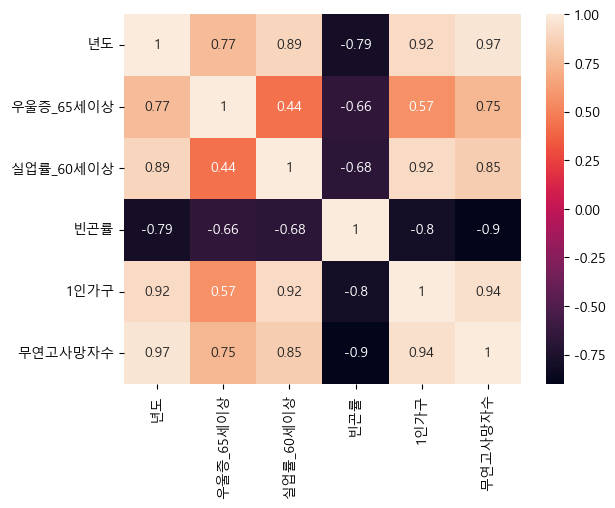

In [5]:
sns.heatmap(select_data.corr(), annot = True)
plt.show()

- 모든 변수의 높은 상관관계 확인
- OLS 분석 시도 

In [6]:
X = select_data.drop(['무연고사망자수', '년도'], axis = 1)
Y = select_data['무연고사망자수']

In [7]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                무연고사망자수   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     121.6
Date:                Sun, 25 Feb 2024   Prob (F-statistic):           1.95e-08
Time:                        15:32:01   Log-Likelihood:                -95.116
No. Observations:                  15   AIC:                             200.2
Df Residuals:                      10   BIC:                             203.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6539.3499   4145.609     -1.577      0.1

g:\내 드라이브\노트북\23-겨울\빅데이터_미래사회\venv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


- 우울증, 빈곤률, 1인가구 feature가 유의미함

- 정규화 후 다시 확인

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = sm.OLS(Y, sm.add_constant(X_scaled)).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                무연고사망자수   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     121.6
Date:                Sun, 25 Feb 2024   Prob (F-statistic):           1.95e-08
Time:                        15:32:03   Log-Likelihood:                -95.116
No. Observations:                  15   AIC:                             200.2
Df Residuals:                      10   BIC:                             203.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1598.0000     43.415     36.807      0.0

g:\내 드라이브\노트북\23-겨울\빅데이터_미래사회\venv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 사망자수 예측 모델 학습 : 우울증, 빈곤률, 1인가구

In [9]:
X = select_data.drop(['무연고사망자수', '년도', '실업률_60세이상'], axis = 1)
Y = select_data['무연고사망자수']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

In [11]:
model = ElasticNet(alpha=0.05, l1_ratio=0.8, max_iter = 50, random_state = 42)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
rmse = mean_squared_error(Y_test, y_pred) ** 0.5
rmse

50.263111168311156

In [12]:
absolute_errors = np.abs(Y_test - y_pred)
mean_absolute_error = np.mean(absolute_errors)
print(mean_absolute_error)

42.98254888120391


In [13]:
r_squared = r2_score(Y_test, y_pred)

print(r_squared)

0.9742946427832289


In [14]:
y_pred

array([1750.96210932, 2463.92720709])

### 다른 3개 feature 예측 모델

In [15]:
X

,우울증_65세이상,빈곤률,1인가구
0,4.55,43.6,17.7
1,4.65,44.1,17.9
2,4.90,45.9,18.2
3,3.55,46.3,18.5
4,4.00,46.5,18.5
5,4.45,45.4,18.4
6,5.55,46.3,18.4
7,5.75,44.5,18.4
8,5.35,43.2,18.5
9,5.80,43.6,18.8


In [16]:
Y

0      603.0
1      563.0
2      521.0
3      578.0
4      675.0
5     1025.0
6     1280.0
7     1379.0
8     1676.0
9     1820.0
10    2008.0
11    2447.0
12    2656.0
13    3136.0
14    3603.0
Name: 무연고사망자수, dtype: float64

In [17]:
prediction = pd.DataFrame()

In [18]:
for feature in X.columns:
    X_train = np.arange(15).reshape(-1, 1)
    Y_train = X[feature].values

    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X_train)

    model_ela = ElasticNet(alpha=1.0, l1_ratio=0.8, max_iter = 50, random_state = 42)
    model_ela.fit(X_poly, Y_train)

    X_future = poly.transform(np.array([15, 16, 17, 18, 19]).reshape(-1, 1))
    Y_future_pred = model_ela.predict(X_future)

    df_future_predictions = pd.DataFrame({feature: Y_future_pred})
    prediction = pd.concat([prediction, df_future_predictions], ignore_index=True)

print(prediction)

    우울증_65세이상        빈곤률       1인가구
0    6.749211        NaN        NaN
1    7.043293        NaN        NaN
2    7.356348        NaN        NaN
3    7.688376        NaN        NaN
4    8.039377        NaN        NaN
5         NaN  38.281989        NaN
6         NaN  37.243355        NaN
7         NaN  36.137713        NaN
8         NaN  34.965063        NaN
9         NaN  33.725403        NaN
10        NaN        NaN  20.502244
11        NaN        NaN  20.844211
12        NaN        NaN  21.208241
13        NaN        NaN  21.594334
14        NaN        NaN  22.002488


In [19]:
prediction.iloc[:5, 1] = prediction.iloc[5:10, 1].values
prediction.iloc[:5, 2] = prediction.iloc[10:15, 2].values

prediction.drop(prediction.index[5:], inplace = True)

prediction

,우울증_65세이상,빈곤률,1인가구
0,6.749211,38.281989,20.502244
1,7.043293,37.243355,20.844211
2,7.356348,36.137713,21.208241
3,7.688376,34.965063,21.594334
4,8.039377,33.725403,22.002488


### 최종 예측 값

In [20]:
result = model.predict(prediction)
result

array([3928.07487868, 4387.86312011, 4877.31511905, 5396.4308755 ,
       5945.21038947])

In [21]:
Y

0      603.0
1      563.0
2      521.0
3      578.0
4      675.0
5     1025.0
6     1280.0
7     1379.0
8     1676.0
9     1820.0
10    2008.0
11    2447.0
12    2656.0
13    3136.0
14    3603.0
Name: 무연고사망자수, dtype: float64

In [22]:
result

array([3928.07487868, 4387.86312011, 4877.31511905, 5396.4308755 ,
       5945.21038947])

In [23]:
predict2 = model.predict(X)
predict2

array([ 617.88466955,  728.37455814,  786.52140082,  616.6815963 ,
        705.32850203,  884.30635942, 1048.95868298, 1327.46052807,
       1464.94704469, 1750.96210932, 2253.91756029, 2463.92720709,
       2523.72003045, 3075.52778072, 3669.37128655])

In [24]:
final = np.concatenate((predict2, result))
final

array([ 617.88466955,  728.37455814,  786.52140082,  616.6815963 ,
        705.32850203,  884.30635942, 1048.95868298, 1327.46052807,
       1464.94704469, 1750.96210932, 2253.91756029, 2463.92720709,
       2523.72003045, 3075.52778072, 3669.37128655, 3928.07487868,
       4387.86312011, 4877.31511905, 5396.4308755 , 5945.21038947])

### 시각화

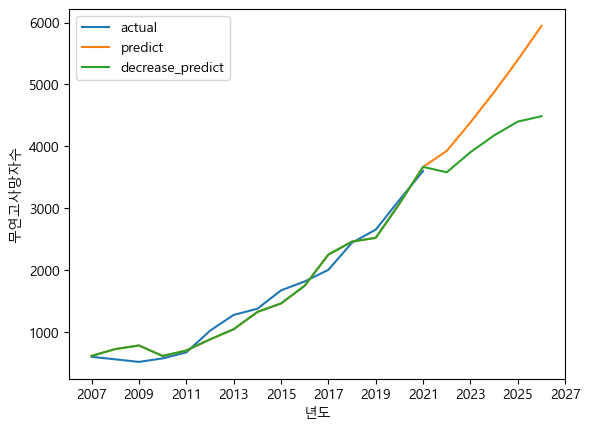

In [32]:
x = np.arange(2007, 2022)
x2 = np.arange(2007, 2027)

sns.lineplot(x = x, y = Y, label = 'actual')
sns.lineplot(x = x2, y = final, label = 'predict')

plt.xlabel('년도')
plt.xticks(np.arange(2007, 2028, 2))
plt.legend()
plt.show()